In [10]:
from numpy import loadtxt
from pandas import read_csv
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [11]:
dataframe = read_csv('resources/websites_full.csv', delimiter=',', index_col=0).set_index('name')
#dataframe = dataframe.groupby('https://edition.cnn.com/2021/09/06/asia/taliban-afghanistan-pregnant-policewoman-murder-intl/index.html').sum()
dataframe

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
name,,,,,,,,,,,,,,,,,,,,,
https://edition.cnn.com/2021/09/06/asia/taliban-afghanistan-pregnant-policewoman-murder-intl/index.html,13,15,14,1,1,387,4,275,5,89,...,479,3402031,39,458049,138,36064,13,97,70,40
https://edition.cnn.com/2021/09/06/americas/columbus-statue-indigenous-woman-mexico-city-cec/index.html,4,11,0,1,0,210,3,253,7,11,...,479,3548487,39,458831,134,41216,19,97,70,42
https://edition.cnn.com/2021/09/06/entertainment/stanley-tucci-cancer/index.html,8,9,14,1,2,401,4,271,6,90,...,587,4748839,41,598947,163,54200,22,97,70,35
https://edition.cnn.com/2021/09/06/world/perseverance-rover-mars-sample-helicopter-scn/index.html,11,11,4,1,1,295,3,256,14,17,...,542,3988747,42,594764,156,36064,14,97,70,33
https://www.bbc.com/news/av/world-asia-india-58498881,10,2,1,1,4,246,1,104,15,203,...,16,1275281,17,49244,56,134516,82,100,100,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://americasfreedomfighters.com/fda-makes/,153,22,2,3,8,192,20,124,37,80,...,119,3506248,56,169485,263,25664,17,20,-200,20
https://americasfreedomfighters.com/man-has-to-say/,113,18,0,3,2,192,21,113,37,76,...,127,4411248,63,240498,279,25664,11,20,-200,21
https://americasfreedomfighters.com/texas-they-got-son/,140,3,6,4,2,195,20,114,37,81,...,119,3675811,57,237474,263,25664,17,20,-200,21


In [12]:
import random
fake = pd.read_csv('resources/training_data/not_that_legit.txt', names=["name"])
true = pd.read_csv('resources/training_data/legit.txt', names=["name"])
fake['label'] = np.random.randint(3, size=fake.shape)
true['label'] = 3+np.random.randint(3, size=true.shape)
fake = fake.append(true)
labels = fake['label']
fake = fake.set_index('name')
df_final = dataframe.merge(fake, left_on='name', right_on='name')
df_final

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,label
name,,,,,,,,,,,,,,,,,,,,,
https://edition.cnn.com/2021/09/06/asia/taliban-afghanistan-pregnant-policewoman-murder-intl/index.html,13,15,14,1,1,387,4,275,5,89,...,3402031,39,458049,138,36064,13,97,70,40,4
https://edition.cnn.com/2021/09/06/americas/columbus-statue-indigenous-woman-mexico-city-cec/index.html,4,11,0,1,0,210,3,253,7,11,...,3548487,39,458831,134,41216,19,97,70,42,3
https://edition.cnn.com/2021/09/06/entertainment/stanley-tucci-cancer/index.html,8,9,14,1,2,401,4,271,6,90,...,4748839,41,598947,163,54200,22,97,70,35,3
https://edition.cnn.com/2021/09/06/world/perseverance-rover-mars-sample-helicopter-scn/index.html,11,11,4,1,1,295,3,256,14,17,...,3988747,42,594764,156,36064,14,97,70,33,4
https://www.bbc.com/news/av/world-asia-india-58498881,10,2,1,1,4,246,1,104,15,203,...,1275281,17,49244,56,134516,82,100,100,69,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://americasfreedomfighters.com/fda-makes/,153,22,2,3,8,192,20,124,37,80,...,3506248,56,169485,263,25664,17,20,-200,20,0
https://americasfreedomfighters.com/man-has-to-say/,113,18,0,3,2,192,21,113,37,76,...,4411248,63,240498,279,25664,11,20,-200,21,0
https://americasfreedomfighters.com/texas-they-got-son/,140,3,6,4,2,195,20,114,37,81,...,3675811,57,237474,263,25664,17,20,-200,21,0


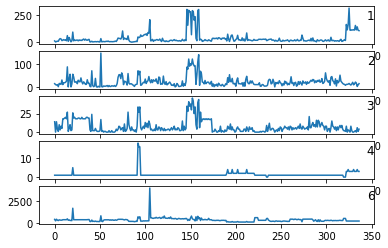

In [13]:
dataset = df_final.values
groups = [0, 1, 2, 3, 5]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(dataset[:, group])
    pyplot.title(dataframe.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [14]:
from numpy import unique
from numpy import argmax
from pandas import read_csv
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

In [15]:
df = df_final.copy()
normalized_df=(df-df.min())/(df.max()-df.min())
dataset = normalized_df.values.astype('float64')

In [16]:
X, y = dataset[:,:-1], dataset[:,-1]
n_features = X.shape
n_class = len(unique(y))
# Separate the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train = X_train.reshape(-1, 1, 40)
X_test  = X_test.reshape(-1, 1, 40)
y_train = y_train.reshape(-1, 1, 1)
y_test = y_test.reshape(-1, 1, 1)
print(X_train.shape)
# Split the remaining data to train and validation
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=1)
# definiowanie modeli
model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[-1])))
model.add(LSTM(units = 256, return_sequences=True))
model.add(LSTM(units=256))
model.add(Dropout(0.35))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.35))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(units=1,activation = 'sigmoid'))

#from tensorflow.keras.optimizers import SGD
#opt = SGD(lr=0.005)
model.compile(loss='mae', optimizer = 'adam')
# dopasowanie
history = model.fit(X_train, y_train, epochs=150, batch_size=95, validation_split=0.33)



(269, 1, 40)
Epoch 1/150
2/2 [==============================] - 21s 3s/step - loss: 0.3055 - val_loss: 0.2922
Epoch 2/150
2/2 [==============================] - 0s 88ms/step - loss: 0.3055 - val_loss: 0.2923
Epoch 3/150
2/2 [==============================] - 0s 87ms/step - loss: 0.3054 - val_loss: 0.2911
Epoch 4/150
2/2 [==============================] - 0s 73ms/step - loss: 0.3051 - val_loss: 0.2905
Epoch 5/150
2/2 [==============================] - 0s 82ms/step - loss: 0.3048 - val_loss: 0.2896
Epoch 6/150
2/2 [==============================] - 0s 105ms/step - loss: 0.3045 - val_loss: 0.2879
Epoch 7/150
2/2 [==============================] - 0s 106ms/step - loss: 0.3040 - val_loss: 0.2862
Epoch 8/150
2/2 [==============================] - 0s 92ms/step - loss: 0.3026 - val_loss: 0.2840
Epoch 9/150
2/2 [==============================] - 0s 80ms/step - loss: 0.3007 - val_loss: 0.2806
Epoch 10/150
2/2 [==============================] - 0s 95ms/step - loss: 0.2967 - val_loss: 0.2755
Epoch

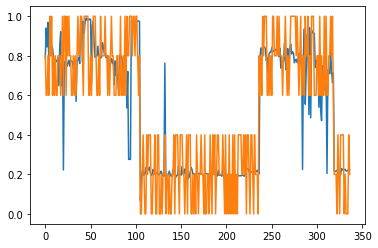

In [17]:
import matplotlib.pyplot as plt
plt.plot(model.predict(X.reshape(-1, 1, 40)))
plt.plot(y)

In [18]:
model.save('models/regression_1s')
model.summary()

INFO:tensorflow:Assets written to: models/regression_1s\assets


INFO:tensorflow:Assets written to: models/regression_1s\assets


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 64)             26880     
                                                                 
 lstm_4 (LSTM)               (None, 1, 256)            328704    
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [20]:
model_1 = keras.models.load_model('models/regression_1s')


In [22]:
model_1.summary()
type(model_1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 64)             26880     
                                                                 
 lstm_4 (LSTM)               (None, 1, 256)            328704    
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

keras.engine.sequential.Sequential